## <center>  <b> NLP Navigator - Assignment 1 </b>  </center>

This is the first assignment of the project and will test your basic python skills and what you have learnt so far about the libraries like numpy and matplotlib. The problem statement and your tasks are described below. You have to rename the notebook as `{Your Name}_Assignment1.ipynb` and write all the code and then generate outputs in it. Submission will be on github and more guidelines will be given soon. The deadline to submit the assignment is `10th June 5:00 PM`

Given a set of $ n $ points in $ d $ dimensional Euclidean Space, we will find all pairs of points whose Euclidean distance is less than $ r $.

Let  $ \overrightarrow{P_1} = (P_{11},P_{12}, \ldots, P_{1d}) $ and $ \overrightarrow{P_2} = (P_{21},P_{22}, \ldots, P_{2d}) $ be two points. Then the Euclidean distance between them is equal to the norm $ \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| $.

We have to find the set $ A = \left\{(i, j): \left|\left| \overrightarrow{P_1} - \overrightarrow{P_2} \right|\right| \leq r \right\} $ where $ i,j \in \{1,2,3,...,n\} $.


Obviously we can find it by using 2 nested loops and searching over all pairs, but we will do the task in an optimised way. Let us make a grid where each cell is of dimension $ r \times r $. Then, (say d = 2)

![graph1](https://drive.google.com/uc?export=view&id=1qIcPgkv9Q3fI-eV5AaAobjFIYy_2siZN)

Divide the points into the cells based on their coordinates. For example, say $ 4 $ points $ \left( \frac{1}{2}, \frac{2}{3} \right), \left( \frac{2}{3}, \frac{3}{2} \right), \left( 1, 1 \right), \left( \frac{3}{2}, \frac{5}{2} \right) $ and $ r = 1 $. So the division should be like -

![graph2](https://drive.google.com/uc?export=view&id=1-u-mT1PTxOkow_uz0T8ZBjU35u63uU7F)

Now comes the observation: For any point, the points which are within distance $ d $ from it must lie in 8 adjacent cells and no where else. So, for every point, just search the points present in 8 adjacent cells, and add the valid pairs to the answer set $ A $. Please note that for corner cells, the number of adjacent cells will not be equal to 8. So, write your code including those cases also.
##### Some points for higher dimension cases:
1. Think whether the number of adjacent cells for higher dimensions will be 8 or more (or less).
2. Observe that the dimension of each cell will not be $r*r$ for each case.
##### <u>Note</u>: Assume the pair $ (i,j) $ and $ (j,i) $ to be same. So write your code accordingly. For example, in 2-D space, we will count $ ((1,2), (4,5)) $ and $ ((4,5), (1,2)) $ only once.

## Tasks TO DO:

1. Generate a set of $ 1000 $ random points in $ 2 $ dimensional space with coordinates ranging between 0 and 100.
2. For $ r = \{ 1, 2, \ldots, 10 \} $, divide the points into grid as shown. 
   - Show using matplotlib the various points using different colours.
   - Find pairs and store them in a list/set $ A $
3. Do task 1 and 2 for $ d = 3, 4, 10, 50, 100 $ (except plotting) and store the results.
(You can also plot for $ d = 3 $ but it is optional)

The value of r is 10
The value of d is 2
The number of pairs satisfying the given conditions is 31453


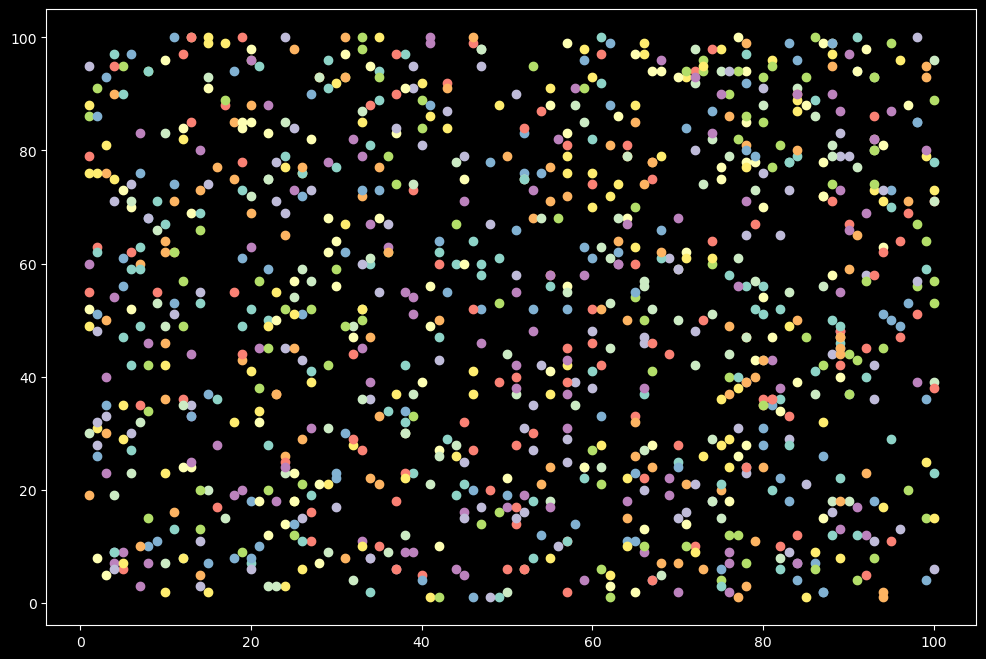

In [42]:
# THIS IS FOR THE CASE WHEN d=2
import numpy as np
import matplotlib.pyplot as m
inputs=np.random.randint(1,101,(1000,2))
grid_values=[]
r=np.random.randint(1,11)
A=[]
for point in inputs:
    x_grid=point[0]//r
    y_grid=point[1]//r
    grid=[x_grid,y_grid]
    grid_values.append(grid)
m.style.use('dark_background')
m.figure(figsize=(12,8))
for i in range(1000):
    m.scatter(inputs[i][0],inputs[i][1])
    m.show
for j in range(1000):
    for k in range(1000):
        if i!=j and distance_calculator(inputs[i],inputs[j])<r:
            cnt+=1/2
            lst=[inputs[i],inputs[j]]
            A.append(lst)
print("The value of r is", r)
print("The value of d is", d)
print("The number of pairs satisfying the given conditions is", int(cnt))
#print("The pairs are :\n", A)


                
    

    


The value of r is 2
The value of d is 2
The number of pairs satisfying the given conditions is 453
The pairs are
 [[array([66, 52]), array([66, 51])], [array([84, 50]), array([83, 49])], [array([80, 47]), array([79, 47])], [array([80, 47]), array([80, 46])], [array([93, 25]), array([92, 26])], [array([93, 25]), array([94, 25])], [array([17, 84]), array([18, 85])], [array([72, 64]), array([73, 63])], [array([57, 98]), array([57, 98])], [array([39, 44]), array([38, 44])], [array([37, 99]), array([38, 99])], [array([37, 99]), array([36, 98])], [array([6, 2]), array([6, 1])], [array([ 9, 42]), array([10, 43])], [array([ 9, 42]), array([10, 43])], [array([34, 41]), array([33, 42])], [array([64, 35]), array([64, 35])], [array([64, 35]), array([64, 35])], [array([38, 85]), array([39, 85])], [array([10,  4]), array([11,  5])], [array([10,  4]), array([9, 3])], [array([ 7, 30]), array([ 7, 30])], [array([41, 95]), array([41, 96])], [array([41, 95]), array([40, 94])], [array([28, 88]), array([29

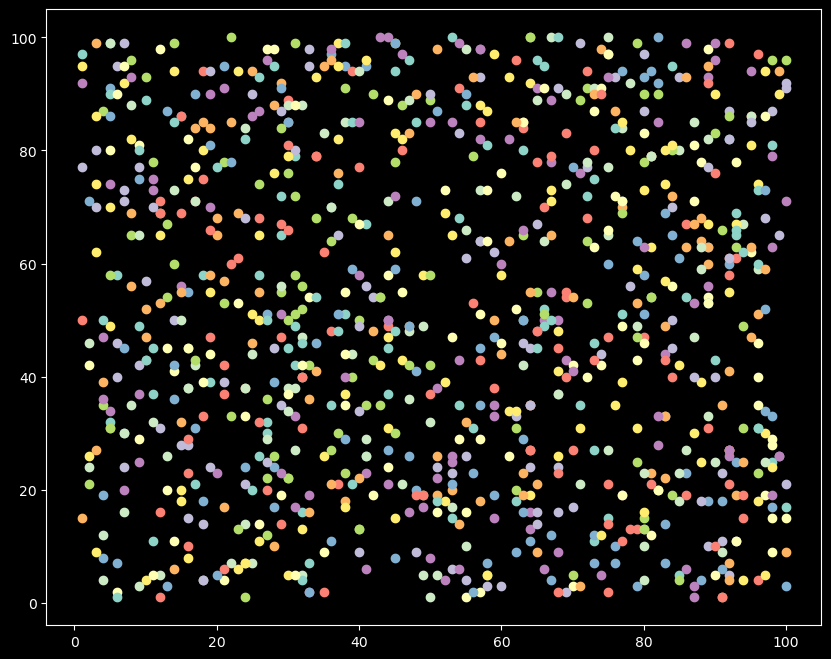

In [33]:
#THIS IS A GENERAL CASE FOR ANY d, GRAPH WILL ONLY BE GENERATED IF d=2.

import numpy as np
import matplotlib.pyplot as m
def points_generator(d):
    points=np.random.randint(1,101,(1000,d))
    return points
def plotting_function(points):   #WILL ONLY PLOT THE POINTS IF d=2.
    m.style.use('dark_background')
    m.figure(figsize=(10,8))
    for i in range(1000):
        m.scatter(points[i][0],points[i][1])
        m.show
def select_r():
    return np.random.randint(1,11)
def divide_into_grids(points,r,d):
    grid_values=[]
    grid=[]
    for point in points:
        for i in range(d):
            x_grid=point[i]//r
            grid.append(x_grid)
        grid_values.append(grid)
        grid=[]
    return grid_values
def distance_calculator(arr1,arr2):
    p1=np.array(arr1)
    p2=np.array(arr2)
    distance=np.linalg.norm(p1-p2)
    return distance
def select_d():
    d_range=[2,3,4,10,50,100]
    i=np.random.randint(0,6)
    return d_range[i]

#START OF CODE

d=select_d()
r=select_r()
inputs=points_generator(d)
grids=divide_into_grids(inputs,r,d)
A=[]
cnt=0
if d==2:
    plotting_function(inputs)   #GRAPH WILL ONLY BE PLOTTED FOR THE CASE WHEN d=2.
for i in range(1000):
    for j in range(1000):
        #if i==j:
            #continue
        #else:
            if i!=j and distance_calculator(inputs[i],inputs[j])<r:
                cnt+=1/2
                lst=[inputs[i],inputs[j]]
                A.append(lst)
print("The value of r is", r)
print("The value of d is", d)
print("The number of pairs satisfying the given conditions is", int(cnt))
print("The pairs are :\n", A)



    
  
        
    
    
    

In [45]:
#THIS IS A GENERAL CASE FOR ANY d, GRAPH WILL ONLY BE GENERATED IF d=2.

import numpy as np
import matplotlib.pyplot as m
def points_generator(d):
    points=np.random.randint(1,101,(1000,d))
    return points
def plotting_function(points):   #WILL ONLY PLOT THE POINTS IF d=2.
    m.style.use('dark_background')
    m.figure(figsize=(10,8))
    for i in range(1000):
        m.scatter(points[i][0],points[i][1])
        m.show
def select_r():
    return np.random.randint(1,11)
def divide_into_grids(points,r,d):
    grid_values=[]
    grid=[]
    for point in points:
        for i in range(d):
            x_grid=point[i]//r
            grid.append(x_grid)
        grid_values.append(grid)
        grid=[]
    return grid_values
def distance_calculator(arr1,arr2):
    p1=np.array(arr1)
    p2=np.array(arr2)
    distance=np.linalg.norm(p1-p2)
    return distance
def select_d():
    d_range=[2,3,4,10,50,100]
    i=np.random.randint(0,6)
    return d_range[i]

#START OF CODE

d=select_d()
r=select_r()
inputs=points_generator(d)
grids=divide_into_grids(inputs,r,d)
A=[]
cnt=0
if d==2:
    plotting_function(inputs)   #GRAPH WILL ONLY BE PLOTTED FOR THE CASE WHEN d=2.
for i in range(1000):
    for j in range(1000):
        #if i==j:
            #continue
        #else:
            if i!=j and distance_calculator(inputs[i],inputs[j])<r:
                cnt+=1/2
                lst=[inputs[i],inputs[j]]
                A.append(lst)
print("The value of r is", r)
print("The value of d is", d)
print("The number of pairs satisfying the given conditions is", int(cnt))
print("The pairs are :\n", A)


The value of r is 6
The value of d is 50
The number of pairs satisfying the given conditions is 0
The pairs are :
 []
